## У ході цієї роботи, ми оглянемо, як працює модель лінійної регресії на математичному рівні та зрівняємо її з побудованою моделлю від Scikit-Learn.

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

## Напишемо функцію гіпотези лінійної регресії у векторному вигляді.

In [2]:
def hypothesis(X, theta):
    return np.dot(X, theta)

## Створимо функцію для обчислення функції втрат у векторному вигляді.

In [3]:
def compute_cost(X, y, theta):
    m = len(y)
    predictions = hypothesis(X, theta)
    errors = predictions - y
    cost = (1 / (2 * m)) * np.dot(errors, errors)
    return cost

## Реалізуємо один крок градієнтного спуску.

In [4]:
def gradient_step(X, y, theta, alpha):
    m = len(y)
    predictions = hypothesis(X, theta)
    errors = predictions - y
    gradient = (1 / m) * np.dot(X.T, errors)
    theta = theta - alpha * gradient
    return theta

## Функція градієнтного спуску

In [5]:
def gradient_descent(X, y, theta, alpha, num_iterations):
    cost_history = []

    for i in range(num_iterations):
        theta = gradient_step(X, y, theta, alpha)

        cost = compute_cost(X, y, theta)
        cost_history.append(cost)

        print(f"Ітерація {i}: Функція втрат = {cost}")

    return theta, cost_history

## Зчитуємо датасет

In [7]:
from google.colab import drive

In [8]:
drive.mount("/content/drive")

Mounted at /content/drive


In [9]:
df = pd.read_csv("/content/drive/MyDrive/data_science/Hw3/Housing.csv")
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


## Утворюємо датафрейм з потрібними залежними змінними та датафрейм з незалежною змінною

In [10]:
X = df[["area", "bedrooms", "bathrooms"]]
y = df["price"]
print(X.head())
print(y.head())

   area  bedrooms  bathrooms
0  7420         4          2
1  8960         4          4
2  9960         3          2
3  7500         4          2
4  7420         4          1
0    13300000
1    12250000
2    12250000
3    12215000
4    11410000
Name: price, dtype: int64


## Стандартизуємо дані та додаємо зсув (одиницю) в кожен рядок

In [11]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = np.c_[np.ones(X_scaled.shape[0]), X_scaled]
print(X_scaled)

[[ 1.          1.04672629  1.40341936  1.42181174]
 [ 1.          1.75700953  1.40341936  5.40580863]
 [ 1.          2.21823241  0.04727831  1.42181174]
 ...
 [ 1.         -0.70592066 -1.30886273 -0.57018671]
 [ 1.         -1.03338891  0.04727831 -0.57018671]
 [ 1.         -0.5998394   0.04727831 -0.57018671]]


## Розбиваємо датасет на тренувальний та тестовий набори

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
print(X_test[0])
y_test = y_test.reset_index(drop=True)
print(y_test.head())

[1.         0.34566751 1.40341936 1.42181174]
0    4060000
1    6650000
2    3710000
3    6440000
4    2800000
Name: price, dtype: int64


## Знайдіть найкращі параметри ваг для датасету використовуючи написані вами функції, прогнозуючу ціну на будинок залежно від площі, кількості ванних кімнат та кількості спалень.

In [13]:
# Початкові параметри
theta = np.zeros(X_train.shape[1])
alpha = 0.1  # Швидкість навчання
num_iterations = 40  # Кількість ітерацій

theta, cost_history = gradient_descent(X_train, y_train, theta, alpha, num_iterations)
print("Знайдені параметри theta:", theta)

Ітерація 0: Функція втрат = 10344946125326.857
Ітерація 1: Функція втрат = 8511750499892.925
Ітерація 2: Функція втрат = 7032197637983.032
Ітерація 3: Функція втрат = 5837540033544.349
Ітерація 4: Функція втрат = 4872526029567.982
Ітерація 5: Функція втрат = 4092716379089.596
Ітерація 6: Функція втрат = 3462343285762.6504
Ітерація 7: Функція втрат = 2952599930297.2485
Ітерація 8: Функція втрат = 2540272209401.441
Ітерація 9: Функція втрат = 2206642958703.079
Ітерація 10: Функція втрат = 1936613467062.9785
Ітерація 11: Функція втрат = 1717998511403.8872
Ітерація 12: Функція втрат = 1540960136908.3955
Ітерація 13: Функція втрат = 1397552508189.5193
Ітерація 14: Функція втрат = 1281355773721.7756
Ітерація 15: Функція втрат = 1187181337338.8066
Ітерація 16: Функція втрат = 1110834465149.2358
Ітерація 17: Функція втрат = 1048922967489.2511
Ітерація 18: Функція втрат = 998702935079.7734
Ітерація 19: Функція втрат = 957954295283.2804
Ітерація 20: Функція втрат = 924880381755.7811
Ітерація 21:

## Візуалізуємо історію навчання моделі

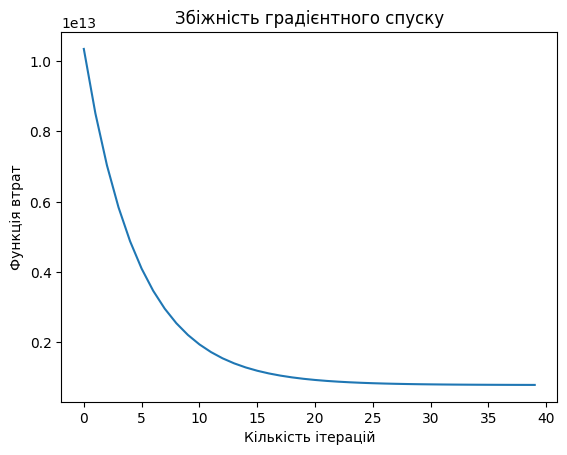

In [14]:
plt.plot(range(num_iterations), cost_history)
plt.xlabel("Кількість ітерацій")
plt.ylabel("Функція втрат")
plt.title("Збіжність градієнтного спуску")
plt.show()

## Вираховуємо середньоквадратичну помилку моделі

In [15]:
cost = compute_cost(X_test, y_test, theta)
cost

1386327957615.3398

## Створюємо датафрейм, в який додамо наші результати предиктів

In [16]:
y_pred = hypothesis(X_test, theta)
y_pred

array([6291132.64559783, 6098364.46336875, 3509975.18947247,
       4242188.4899741 , 3882558.41112573, 4836961.31268485,
       5459397.98761471, 5976456.32660551, 3233336.66728142,
       3446852.73867483, 8555350.43922427, 3473320.58528216,
       3399319.78059605, 3585171.99977036, 3886016.39265312,
       6443402.50929479, 2804546.95788529, 4587986.64271291,
       4536116.91980209, 4187739.56884054, 4249104.45302887,
       4873270.11872243, 3374768.11175159, 3827230.70668752,
       5366032.48637524, 7294826.07184503, 3181466.9443706 ,
       4888070.9287829 , 7077733.34243235, 3150345.11062411,
       5233869.08152172, 3592087.96282513, 5925465.38699934,
       4800652.50664728, 4564630.97948023, 5441347.973165  ,
       4119775.94390456, 4013082.92586183, 3716575.2978111 ,
       5214662.99612191, 5272666.98513576, 3368197.94684956,
       6070700.61114964, 3965549.96778305, 4447088.18339465,
       4147972.78127558, 5925465.38699934, 4517948.22886049,
       4896625.7819551 ,

In [17]:
columns = X.columns.insert(0, "intercept")
df_with_predictions = pd.DataFrame(X_test, columns=columns)
df_with_predictions["y"] = y_test
df_with_predictions["prediction"] = y_pred
df_with_predictions.head()

,intercept,area,bedrooms,bathrooms,y,prediction
0,1.0,0.345668,1.403419,1.421812,4060000,6.291133e+06
1,1.0,0.622401,0.047278,1.421812,6650000,6.098364e+06
2,1.0,-0.512207,-1.308863,-0.570187,3710000,3.509975e+06
3,1.0,-0.069433,0.047278,-0.570187,6440000,4.242188e+06
4,1.0,-0.549105,0.047278,-0.570187,2800000,3.882558e+06


## Візуалізуємо відхилення результатів предикту від точних значень

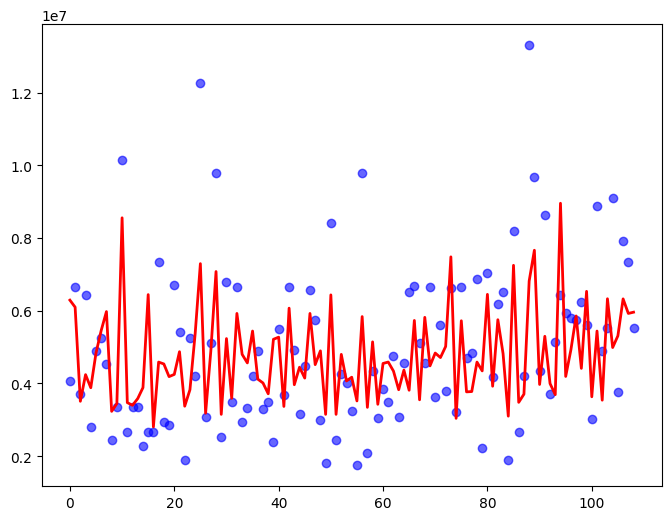

In [18]:
plt.figure(figsize=(8, 6))
plt.scatter(df_with_predictions.index, df_with_predictions['y'], color='blue', label='Actual values', alpha=0.6)
plt.plot(df_with_predictions.index, df_with_predictions['prediction'], color='red', label='Prediction', linewidth=2)

## Знайдемо ці ж параметри за допомогою аналітичного рішення.

In [19]:
def normal_equation(X, y):
    theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    return theta

In [20]:
theta_normal = normal_equation(X_train, y_train)
print(theta_normal)

[4736303.16152964  749023.05142651  265604.85843734  714016.44847748]


In [21]:
cost_normal = compute_cost(X_test, y_test, theta_normal)
cost_normal

1375020239654.5261

In [22]:
y_normal_pred = hypothesis(X_test, theta_normal)
y_normal_pred

array([6383168.05981191, 6230250.35140427, 3597885.28090091,
       4289730.8386382 , 3930445.60575177, 4883933.33918115,
       5505773.16533075, 6068793.48103628, 3321512.02483442,
       3495157.72744705, 8731338.12527606, 3561265.8244721 ,
       3487335.97847432, 3633344.35548029, 3933900.2714526 ,
       6661080.95290715, 2893133.47793137, 4635197.40872131,
       4583377.42320885, 4274999.75826381, 4296640.17003987,
       4920207.32903988, 3462807.85199841, 3875170.95453847,
       5412497.19140831, 7425564.68389184, 3269692.03932196,
       5021117.35611339, 7122556.71331971, 3238600.04801448,
       5366583.9261965 , 3640253.68688196, 6057517.06636272,
       4847659.34932243, 4572198.51082701, 5573863.86824636,
       4167435.67282878, 4021179.33154445, 3764621.65211188,
       5307730.62714319, 5319221.21748587, 3456243.98716684,
       6202613.02579763, 4013357.58257172, 4534099.68582614,
       4235271.10270425, 6057517.06636272, 4525560.52386579,
       4983206.22693418,

In [23]:
df_with_normal_predictions = df_with_predictions.drop(columns=["prediction"])
df_with_normal_predictions["prediction"] = y_normal_pred
df_with_normal_predictions.head()

,intercept,area,bedrooms,bathrooms,y,prediction
0,1.0,0.345668,1.403419,1.421812,4060000,6.383168e+06
1,1.0,0.622401,0.047278,1.421812,6650000,6.230250e+06
2,1.0,-0.512207,-1.308863,-0.570187,3710000,3.597885e+06
3,1.0,-0.069433,0.047278,-0.570187,6440000,4.289731e+06
4,1.0,-0.549105,0.047278,-0.570187,2800000,3.930446e+06


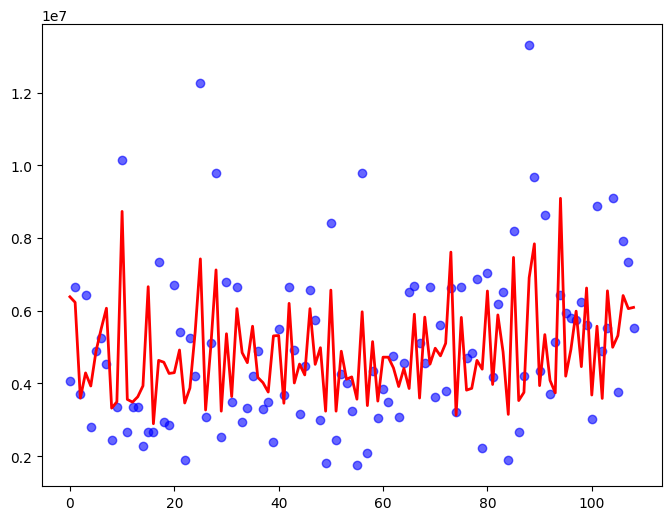

In [24]:
plt.figure(figsize=(8, 6))
plt.scatter(df_with_normal_predictions.index, df_with_normal_predictions['y'], color='blue', label='Actual values', alpha=0.6)
plt.plot(df_with_normal_predictions.index, df_with_normal_predictions['prediction'], color='red', label='Prediction', linewidth=2)

## Створюємо модель за допомогою бібліотеки sklearn

In [25]:
model = LinearRegression()
X_train1 = X_train[:, 1:]
X_test1 = X_test[:, 1:]
model.fit(X_train1, y_train)
y_sklearn_pred = model.predict(X_test1)
mse = mean_squared_error(y_test, y_sklearn_pred)
print(f"Середня квадратична помилка (MSE): {mse}")
theta_sklearn = model.coef_
intercept_sklearn = model.intercept_
print(f"theta: {theta_sklearn}")
print(f"intercept: {intercept_sklearn}")

Середня квадратична помилка (MSE): 2750040479309.0522
theta: [749023.05142651 265604.85843734 714016.44847748]
intercept: 4736303.161529644


In [26]:
df_with_sklearn_predictions = df_with_predictions.drop(columns=["prediction"])
df_with_sklearn_predictions["prediction"] = y_sklearn_pred
df_with_sklearn_predictions

,intercept,area,bedrooms,bathrooms,y,prediction
0,1.0,0.345668,1.403419,1.421812,4060000,6.383168e+06
1,1.0,0.622401,0.047278,1.421812,6650000,6.230250e+06
2,1.0,-0.512207,-1.308863,-0.570187,3710000,3.597885e+06
3,1.0,-0.069433,0.047278,-0.570187,6440000,4.289731e+06
4,1.0,-0.549105,0.047278,-0.570187,2800000,3.930446e+06
...,...,...,...,...,...,...
104,1.0,0.391790,1.403419,-0.570187,9100000,4.995395e+06
105,1.0,0.820727,1.403419,-0.570187,3773000,5.316679e+06
106,1.0,0.391790,1.403419,1.421812,7910000,6.417715e+06
107,1.0,0.391790,0.047278,1.421812,7350000,6.057517e+06


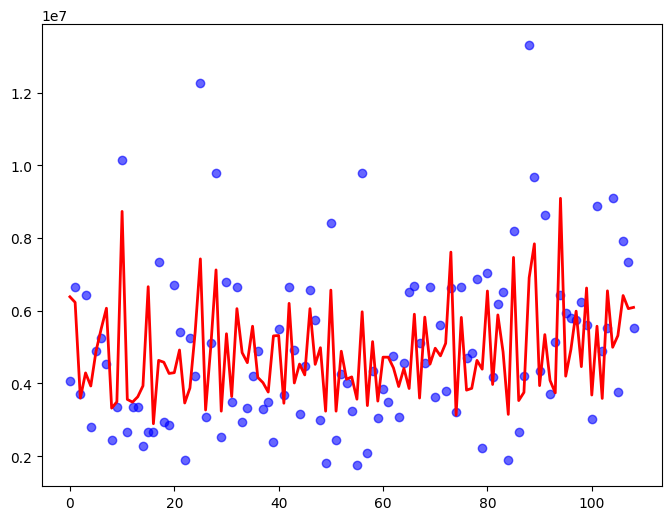

In [27]:
plt.figure(figsize=(8, 6))
plt.scatter(df_with_sklearn_predictions.index, df_with_sklearn_predictions['y'], color='blue', label='Actual values', alpha=0.6)
plt.plot(df_with_sklearn_predictions.index, df_with_sklearn_predictions['prediction'], color='red', label='Prediction', linewidth=2)

## Порівнюємо відхилення кожної моделі

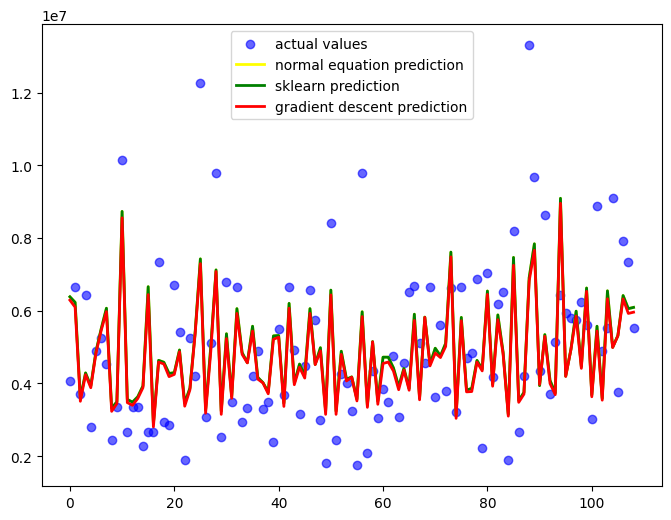

In [28]:
plt.figure(figsize=(8, 6))
plt.scatter(df_with_sklearn_predictions.index, df_with_sklearn_predictions['y'], color='blue', label='actual values', alpha=0.6)
plt.plot(df_with_normal_predictions.index, df_with_normal_predictions['prediction'], color='yellow', label='normal equation prediction', linewidth=2)
plt.plot(df_with_sklearn_predictions.index, df_with_sklearn_predictions['prediction'], color='green', label='sklearn prediction', linewidth=2)
plt.plot(df_with_predictions.index, df_with_predictions['prediction'], color='red', label='gradient descent prediction', linewidth=2)
plt.legend()

## Для перевірки спрогнозованих значень, використаємо LinearRegression з бібліотеки scikit-learn та порівняємо результати

In [29]:
print("Параметри theta (перший індекс = зсув):")
print(f"Градієнтний спуск: {theta}")
print(f"Нормальне рівняння: {theta_normal}")
print(f"Scikit-learn: {np.insert(theta_sklearn, 0, intercept_sklearn)}")
print()
print("Середньоквадратичні помилки:")
print(f"Градієнтний спуск: {cost}")
print(f"Нормальне рівняння: {cost_normal}")
print(f"Scikit-learn: {mse}")

Параметри theta (перший індекс = зсув):
Градієнтний спуск: [4663129.77281183  749741.97208073  295136.75966737  671425.59534973]
Нормальне рівняння: [4736303.16152964  749023.05142651  265604.85843734  714016.44847748]
Scikit-learn: [4736303.16152964  749023.05142651  265604.85843734  714016.44847748]

Середньоквадратичні помилки:
Градієнтний спуск: 1386327957615.3398
Нормальне рівняння: 1375020239654.5261
Scikit-learn: 2750040479309.0522


## Висновки:
## Отже, ми отримали наступні результати:


1.   Функція градієнтного спуску має середньоквадратичну помилку - 1386327957615.3398
2.   Нормальне рівняння має середньоквадратичну помилку - 1375020239654.5261
3.   Лінійна регресія від Scikit-Learn має середньоквадратичну помилку - 2750040479309.0522

## А значить, що побудована модель лінійної регресії показала найкращий результат передбачень у другому способі, (з використанням функції нормального рівняння) адже середньоквадратична помилка там найменша. У випадку з третім способом, (модель від Scikit-Learn) ця модель показала найгірший результат, бо помилка більша у два рази.


